<a href="https://colab.research.google.com/github/taetae991202/machine_learning/blob/main/%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/지능형시스템/housing.data', header=None, sep='\s+')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


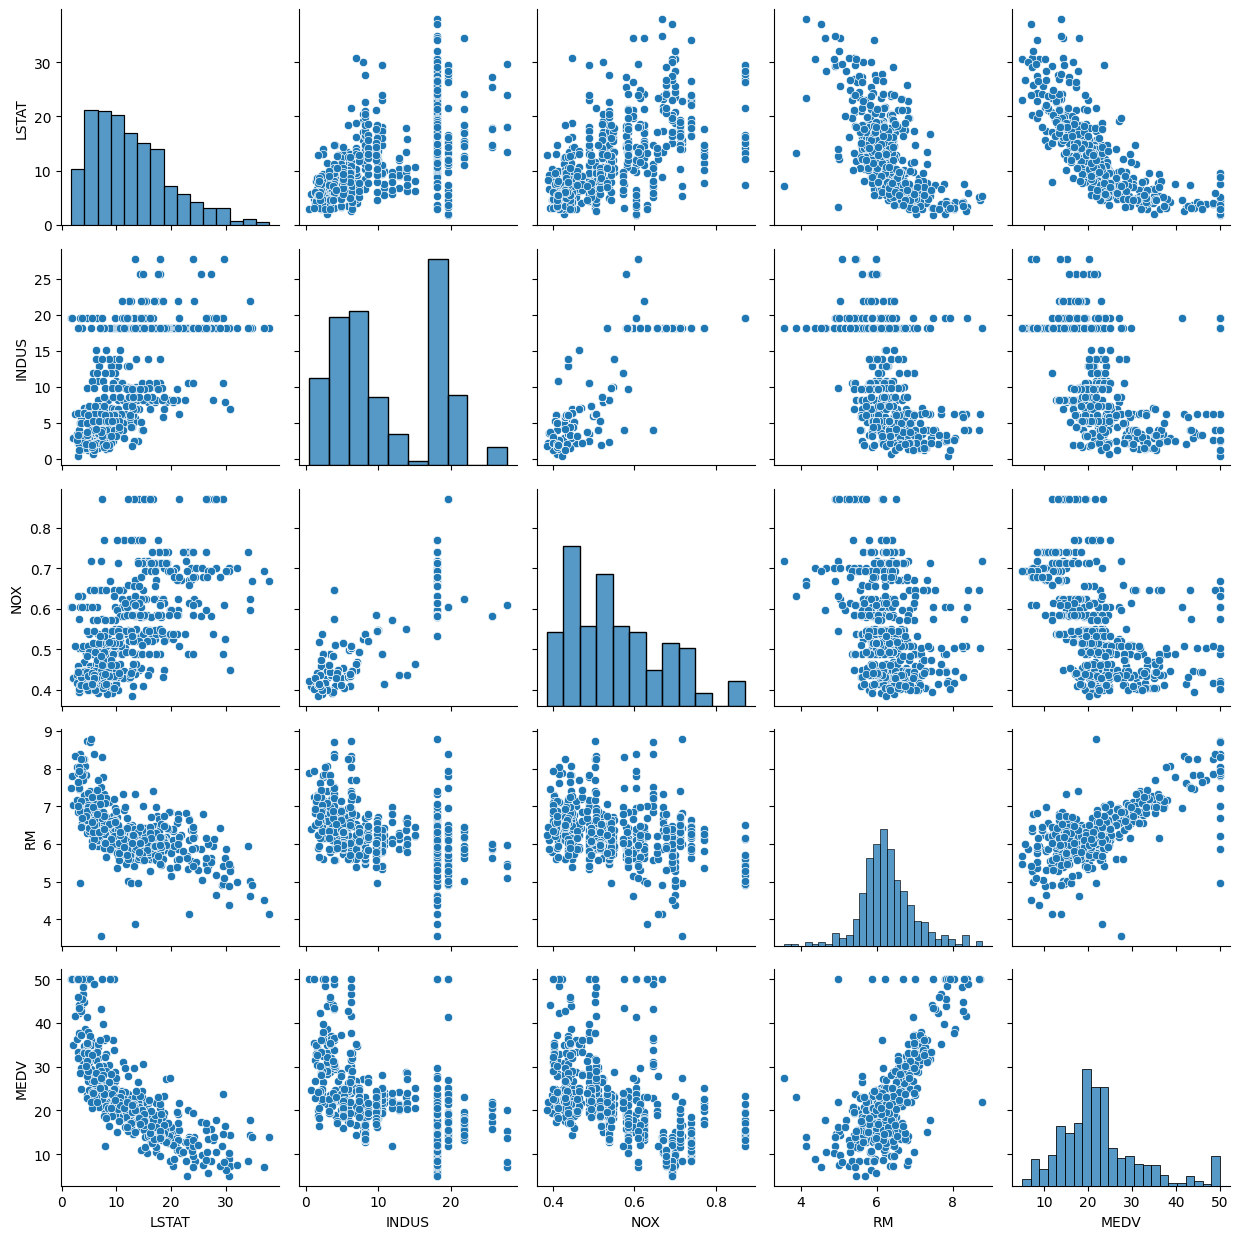

In [ ]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(housing[cols], height=2.5)
plt.tight_layout()
plt.show()

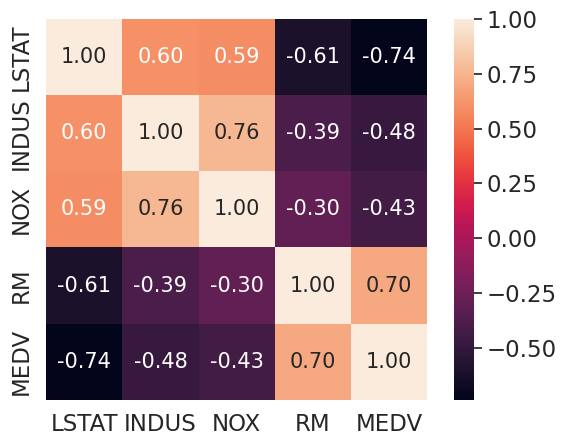

In [ ]:
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels = cols)
plt.tight_layout()
plt.show()

In [ ]:
X = housing[['RM']].values
y = housing[['MEDV']].values
print(X.shape)
print(y.shape)

(506, 1)
(506, 1)


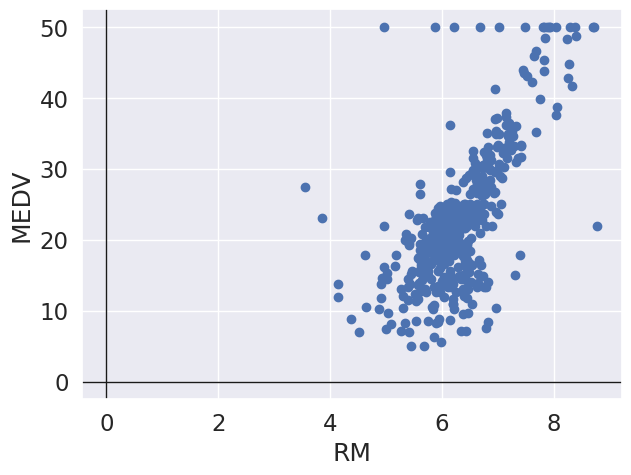

In [ ]:
plt.figure()
plt.scatter(X, y)
plt.tight_layout()
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.axvline(x=0, color='k', linewidth=1)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

In [ ]:
def normalization(x):
  m, u = x.mean(), x.std()
  return (x-m) / u

In [ ]:
X_norm = normalization(X)
y_norm = normalization(y)

Text(0.5, 11.049999999999999, 'RM')

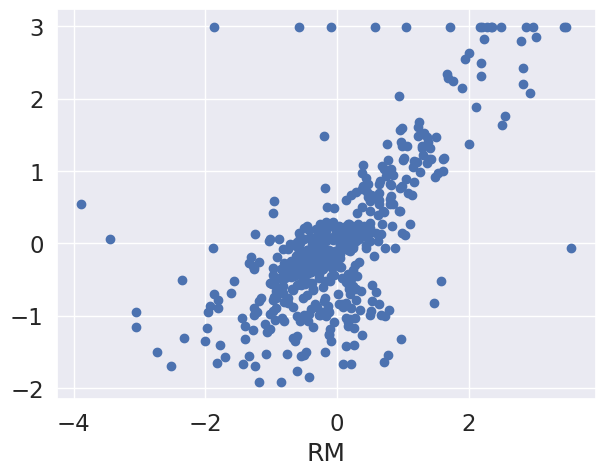

In [ ]:
plt.figure()
plt.scatter(X_norm, y_norm)
plt.tight_layout()
plt.xlabel('RM')

In [ ]:
def lin_regplot(X, y, model):
  plt.figure()
  plt.scatter(X, y, c='sttelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), c='black', lw=2)

In [ ]:
class NormalEquation(object):
  def __init__(self, X):
    Xb = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.zeros(X.shape[1])
    z = np.linalg.inv(np.dot(Xb.T, Xb))
    self.w = np.dot(z, np.dot(Xb.T, y))

  def __repr__(self):
    return f"기울기 : {self.w[1][0]:.3f} \n절편 : {self.w[0][0]: .3f}"

  def predict(self, x):
    return np.dot(x, self.w[1:] + self.w[0])


linReg = NormalEquation(X)
print(linReg)



기울기 : 9.102 
절편 : -34.671


In [ ]:
class LinearRegression(object):
  def __init__(self, eta=0.001,
               n_iter=20,
               random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.random_state = random_state

  def _initialze_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=.0, scale=0.01, size=1+m)
    self.w_initialized = True


  # def _shuffle(self, X, y): # 안해도 됨
  #   r = self.regen.pemutation(len(y))
  #   return X[r], y[r]

  def net_input(self, X):
    return np.dot(X, self.v_[1:] + self.w_[0])

  def fit(self, X, y):
    self._initialze_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.t.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / len(errors)
      self.cost_.append(cost)

  def predict(self, X):
    return (self.net_input(X))

  def __repr__(self):
    return f"기울기 : {self.w_[1:]} \n절편 : {self.w+[0]}"

In [ ]:
GD = LinearRegressionGD()
GD.fit(X_norm, y_norm)
plt.plot(range(1, GD.n_iter+1), GD.cost_)
plt.ylabel("MSE")
plt.xlabel("EPOCH")
plt.show()

In [ ]:
print(GD)
lin_regplot(X_norm, y_norm)